## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Generate Sample Dataset

In [2]:
X, y = make_classification(n_samples=5000, n_features=3, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=42)

## Split Data Into Training and Test Set

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (3, 4000)
Shape of X_test:  (3, 1000)
Shape of y_train:  (1, 4000)
Shape of y_test:  (1, 1000)


## Sigmoid Function

The sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

where:
- $\sigma(x)$ is the output of the sigmoid function.
- $x$ is the input to the function.
- $e$ is the base of the natural logarithm, approximately equal to 2.71828.


In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Logistic Regression Cost Function 

The logistic regression loss function, also known as the binary cross-entropy loss, is defined as:

$$
L(y, \hat{y}) = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

where:
- $L(y, \hat{y})$ is the loss.
- $y$ is the true label (0 or 1).
- $\hat{y}$ is the predicted probability that the label is 1.

For a dataset with \( N \) samples, the average loss is:

$$
\frac{1}{N} \sum_{i=1}^{N} L(y_i, \hat{y}_i) = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

where:
- $N$ is the number of samples.
- $ y_i$ is the true label for the \( i \)-th sample.
- $\hat{y}_i$ is the predicted probability for the \( i \)-th sample.


## Code 

In [7]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1]
    n = X_train.shape[0]
    
    W = np.zeros((n,1))
    B = 0
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)) # A == 𝑦̂
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [8]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.2045304031497841
cost after  20000 iteration is :  0.17715119099994572
cost after  30000 iteration is :  0.16795272567058453
cost after  40000 iteration is :  0.1636375769696291
cost after  50000 iteration is :  0.16128109264965082
cost after  60000 iteration is :  0.15987660518277216
cost after  70000 iteration is :  0.15899069365718418
cost after  80000 iteration is :  0.1584093672614987
cost after  90000 iteration is :  0.158016716674271


## Learning Graph

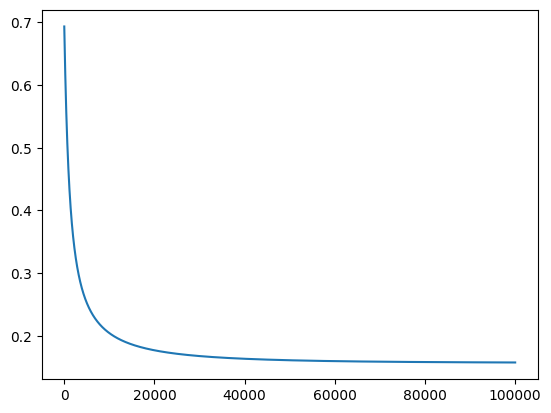

In [9]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

## Model Evaluation

In [10]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [11]:
accuracy(X_test, y_test, W, B)

Accuracy of the model is :  94.2 %


Huge thanks to coding lane!!!